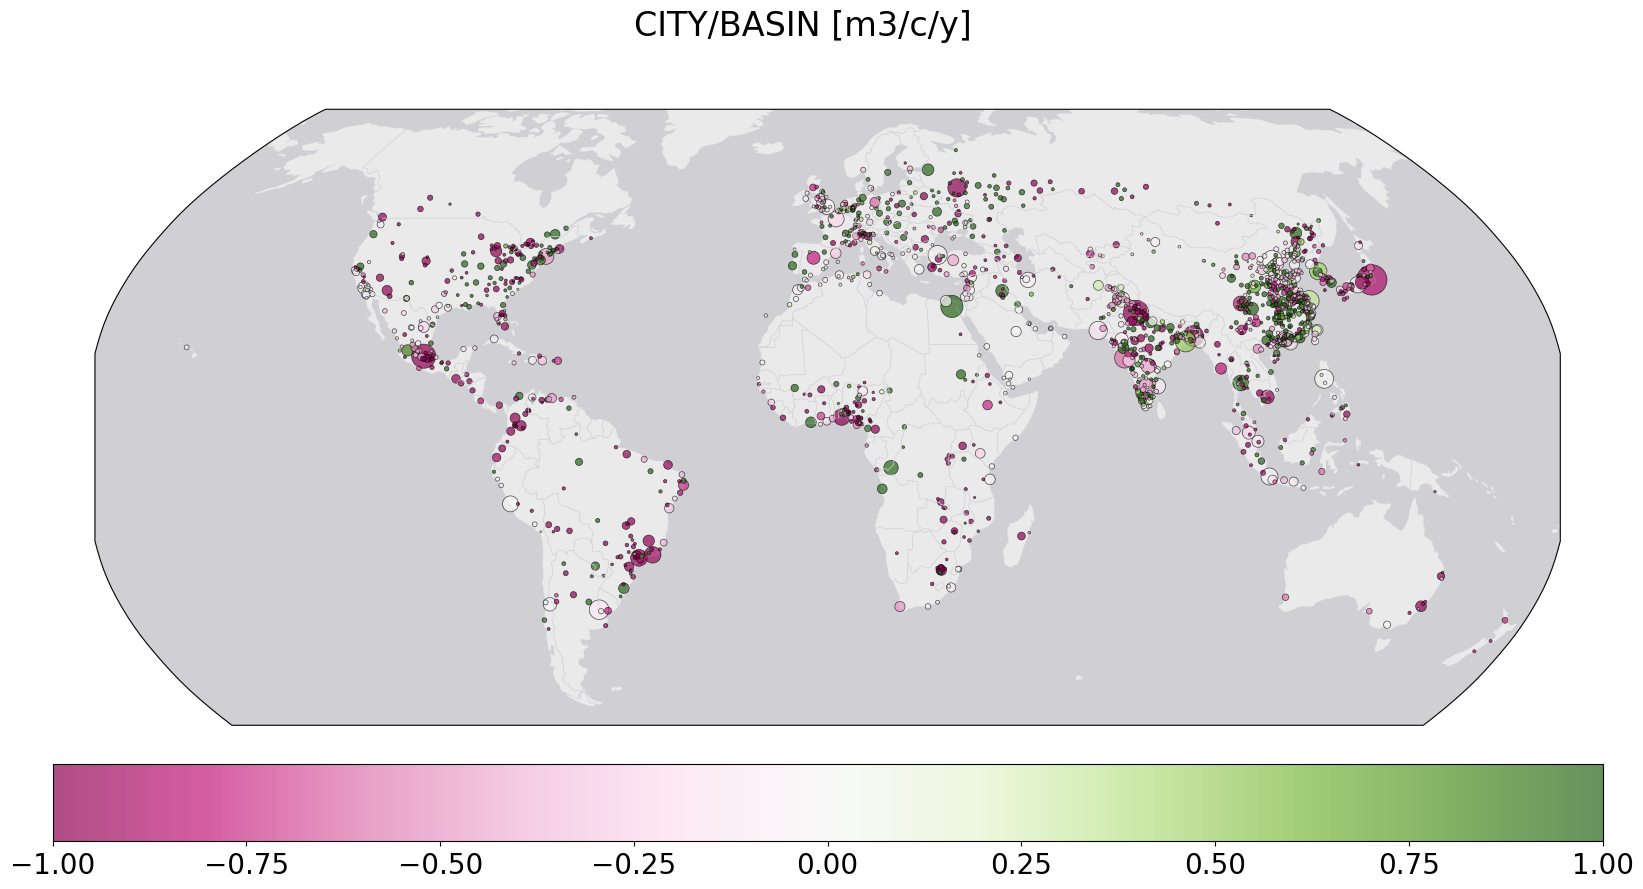

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)
#([city_num, cnt_lon, cnt_lat, cmy])

mcy_path = f"{h08dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup/1e3
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]
        potential = ava_unit - dwn_unit

    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
# city/basin
# blue(green) = city has more water availability per capita (m3/cap/year)
# red(purple) = basin has more water availability per capita (m3/cap/year) 
for i, j in zip(city_list, basin_list):
    #rate = float(i[3]/j[3])
    rate = i[3]/j[3]
    diff = i[3] - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

# diff
diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:,3] / max_abs_diff
diff_array[:,3] = diff_tmp

# rate
rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
        rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i,3], -1/rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent, population):
    #norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-0.2, vmax=0.2)
    #cmap = 'coolwarm_r'
    #cmap = 'PiYG'
    
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    img = ax.scatter(
                  array[:, 1], 
                  array[:, 2], 
                  c=array[:, 3], 
                  s=population*15, 
                  cmap= cmap,
                  norm=norm,
                  transform=ccrs.PlateCarree(), 
                  alpha=0.7,
                  edgecolor='k',
                  linewidth=0.5
                 )
    #ax.gridlines()
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
    fig.suptitle('CITY/BASIN [m3/c/y]')
    plt.show()

norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
cmap = 'PiYG'
extent = [-180, 180, -60, 75]
plot_world(diff_array, norm, cmap, extent, pop_array)

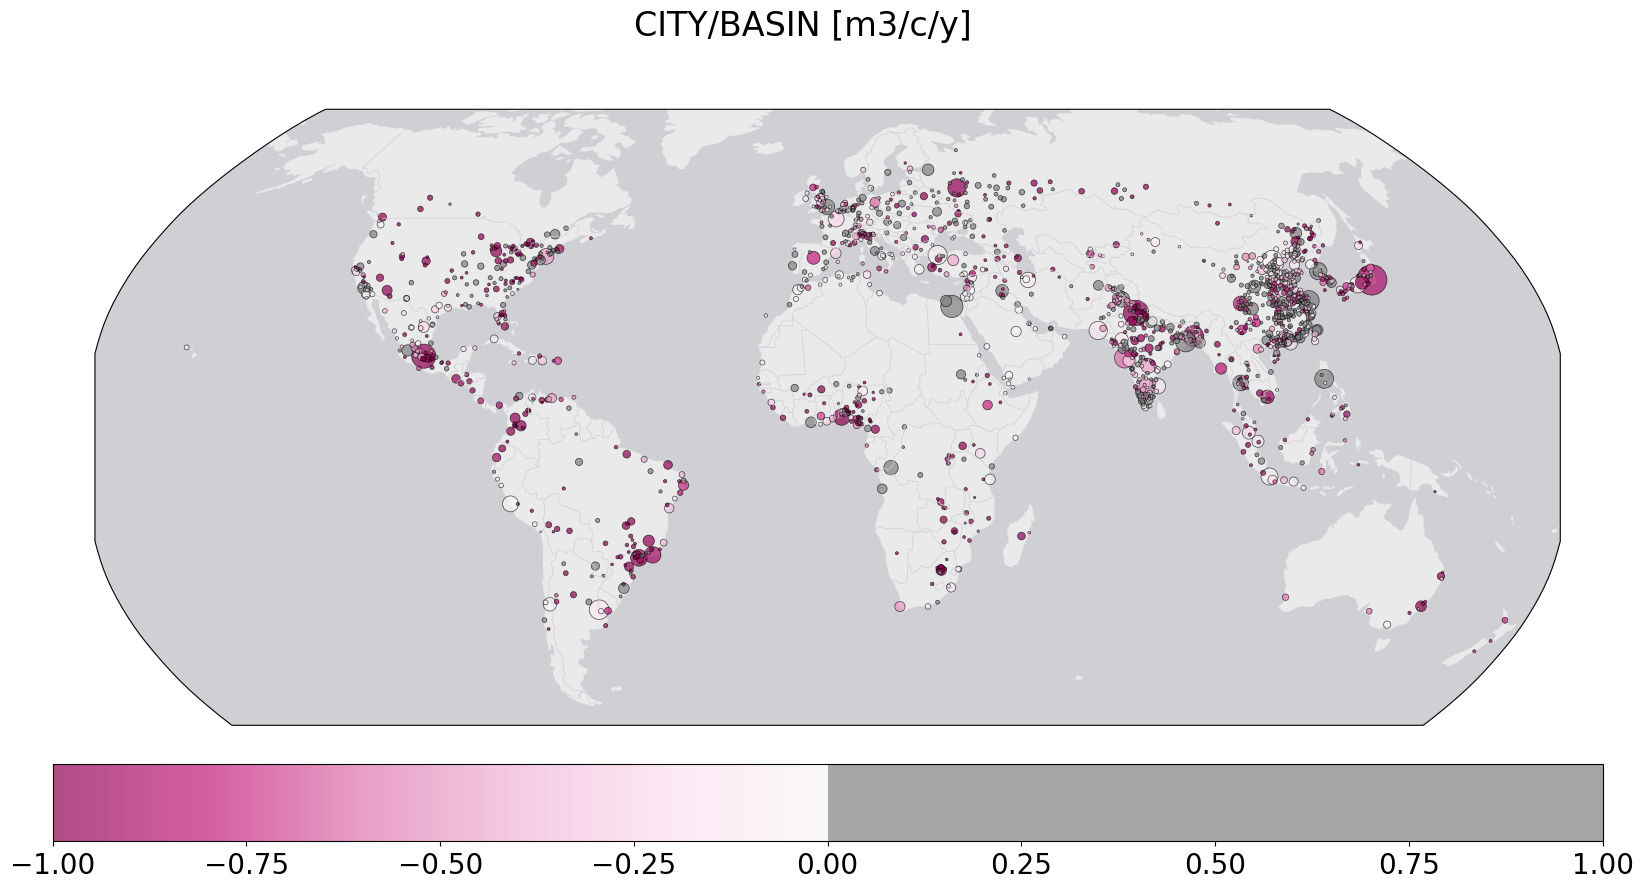

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)
#([city_num, cnt_lon, cnt_lat, cmy])

mcy_path = f"{h08dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup/1e3
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]
        potential = ava_unit - dwn_unit

    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
# city/basin
# blue(green) = city has more water availability per capita (m3/cap/year)
# red(purple) = basin has more water availability per capita (m3/cap/year) 
for i, j in zip(city_list, basin_list):
    #rate = float(i[3]/j[3])
    rate = i[3]/j[3]
    diff = i[3] - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

# diff
diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:,3] / max_abs_diff
diff_array[:,3] = diff_tmp

# rate
rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
        rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i,3], -1/rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent, population):
    #norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-0.2, vmax=0.2)
    #cmap = 'coolwarm_r'
    #cmap = 'PiYG'
    
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    img = ax.scatter(
                  array[:, 1], 
                  array[:, 2], 
                  c=array[:, 3], 
                  s=population*15, 
                  cmap= cmap,
                  norm=norm,
                  transform=ccrs.PlateCarree(), 
                  alpha=0.7,
                  edgecolor='k',
                  linewidth=0.5
                 )
    #ax.gridlines()
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
    fig.suptitle('CITY/BASIN [m3/c/y]')
    plt.show()

norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
cmap_base = plt.get_cmap('PiYG')
colors = cmap_base(np.linspace(0, 1, cmap_base.N))
colors[cmap_base.N//2:] = [0.5, 0.5, 0.5, 1]  # 灰色に置き換える

cmap_custom = LinearSegmentedColormap.from_list('PiYG_gray', colors)
extent = [-180, 180, -60, 75]
plot_world(diff_array, norm, cmap_custom, extent, pop_array)

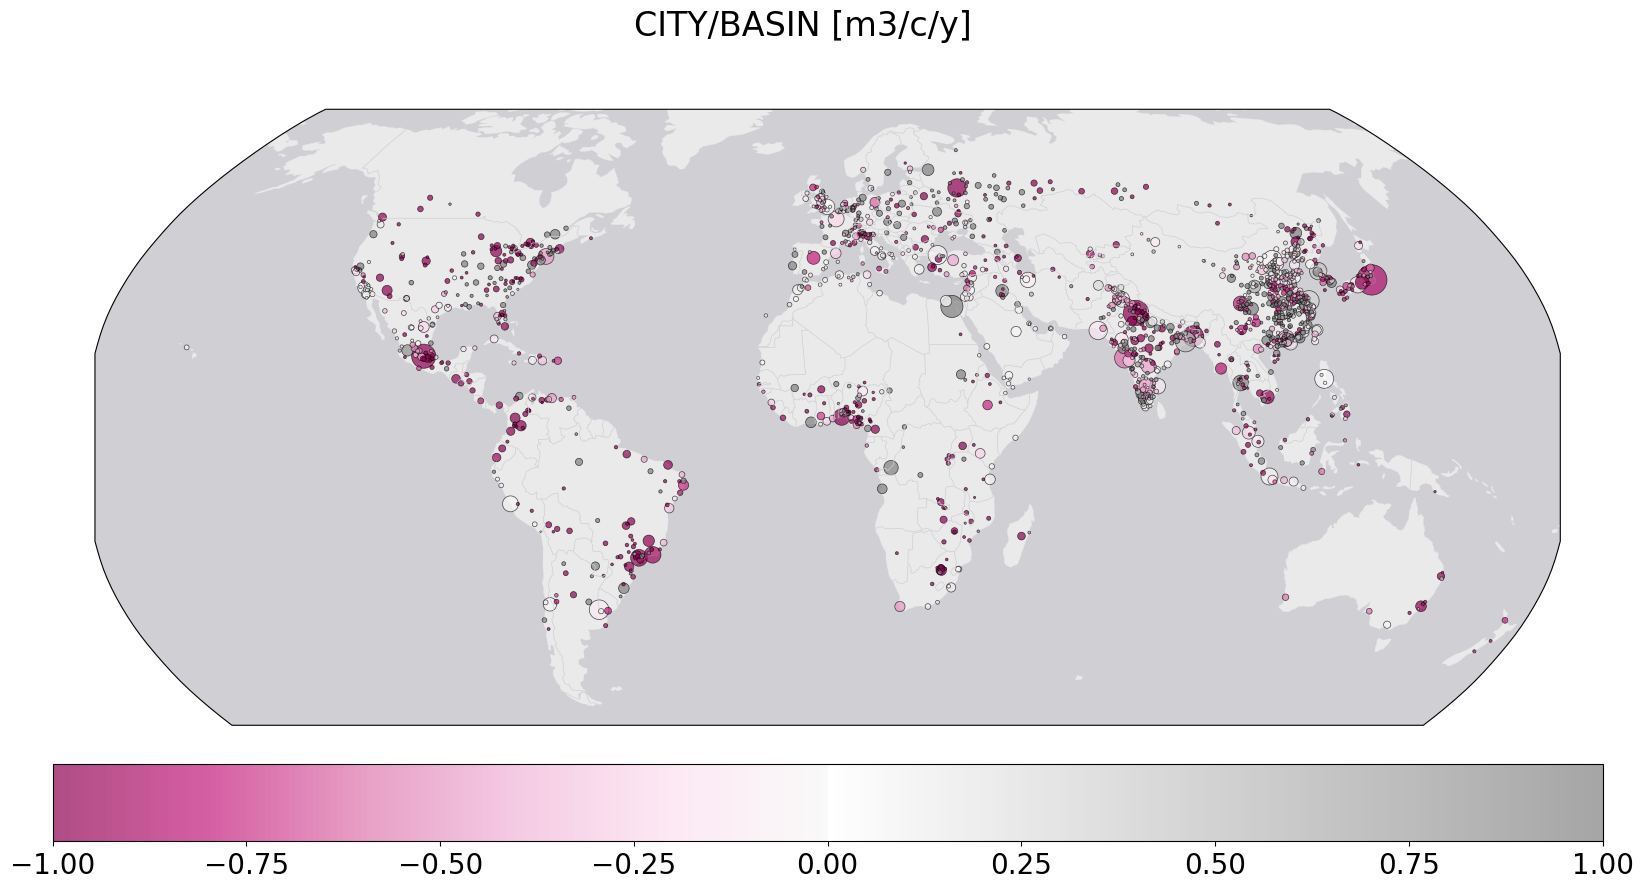

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)
#([city_num, cnt_lon, cnt_lat, cmy])

mcy_path = f"{h08dir}/global_city/dat/cty_lst_/gpw4/mcy_pop_water.txt"
#mcy = [citynum, flag, rate, wup, pop, avail, mpcy, gridnum, region, country, cityname]
with open(mcy_path, 'r') as files:
    text = files.readlines()

population = []
for ind in range(1860):
    line = text[ind]
    parts = line.split('|')
    parts = [item.strip() for item in parts]
    city_num = int(parts[0])
    flag = parts[1]
    if flag == 'NoMASK':
        continue
    else:
        rate = parts[2]
        wup = float(parts[3])
        wup_unit = wup/1e3
        dwn = float(parts[4])
        dwn_unit = dwn/1e6
        ava = float(parts[5])
        ava_unit = ava/1e9
        mcy = float(parts[6])
        cel = int(float(parts[7]))
        region = parts[8]
        country = parts[9]
        city_name = parts[10]
        potential = ava_unit - dwn_unit

    population.append(dwn_unit)
pop_array = np.array(population)

RATE = []
DIFF = []
# city/basin
# blue(green) = city has more water availability per capita (m3/cap/year)
# red(purple) = basin has more water availability per capita (m3/cap/year) 
for i, j in zip(city_list, basin_list):
    #rate = float(i[3]/j[3])
    rate = i[3]/j[3]
    diff = i[3] - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

# diff
diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:,3] / max_abs_diff
diff_array[:,3] = diff_tmp

# rate
rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
        rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i,3], -1/rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent, population):
    #norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-0.2, vmax=0.2)
    #cmap = 'coolwarm_r'
    #cmap = 'PiYG'
    
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    img = ax.scatter(
                  array[:, 1], 
                  array[:, 2], 
                  c=array[:, 3], 
                  s=population*15, 
                  cmap= cmap,
                  norm=norm,
                  transform=ccrs.PlateCarree(), 
                  alpha=0.7,
                  edgecolor='k',
                  linewidth=0.5
                 )
    #ax.gridlines()
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
    fig.suptitle('CITY/BASIN [m3/c/y]')
    plt.show()

norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
cmap_base = plt.get_cmap('PiYG')
colors = cmap_base(np.linspace(0, 1, cmap_base.N))
white_to_gray = np.linspace(1, 0.5, cmap_base.N//2)  # 白から灰色へのグラデーション
for i in range(cmap_base.N//2, cmap_base.N):
    colors[i] = [white_to_gray[i - cmap_base.N//2]] * 3 + [1]  # RGBすべてに同じ値を設定し、アルファ値は1
cmap_custom = LinearSegmentedColormap.from_list('PiYG_custom', colors)
extent = [-180, 180, -60, 75]
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
plot_world(diff_array, norm, cmap_custom, extent, pop_array)

1553


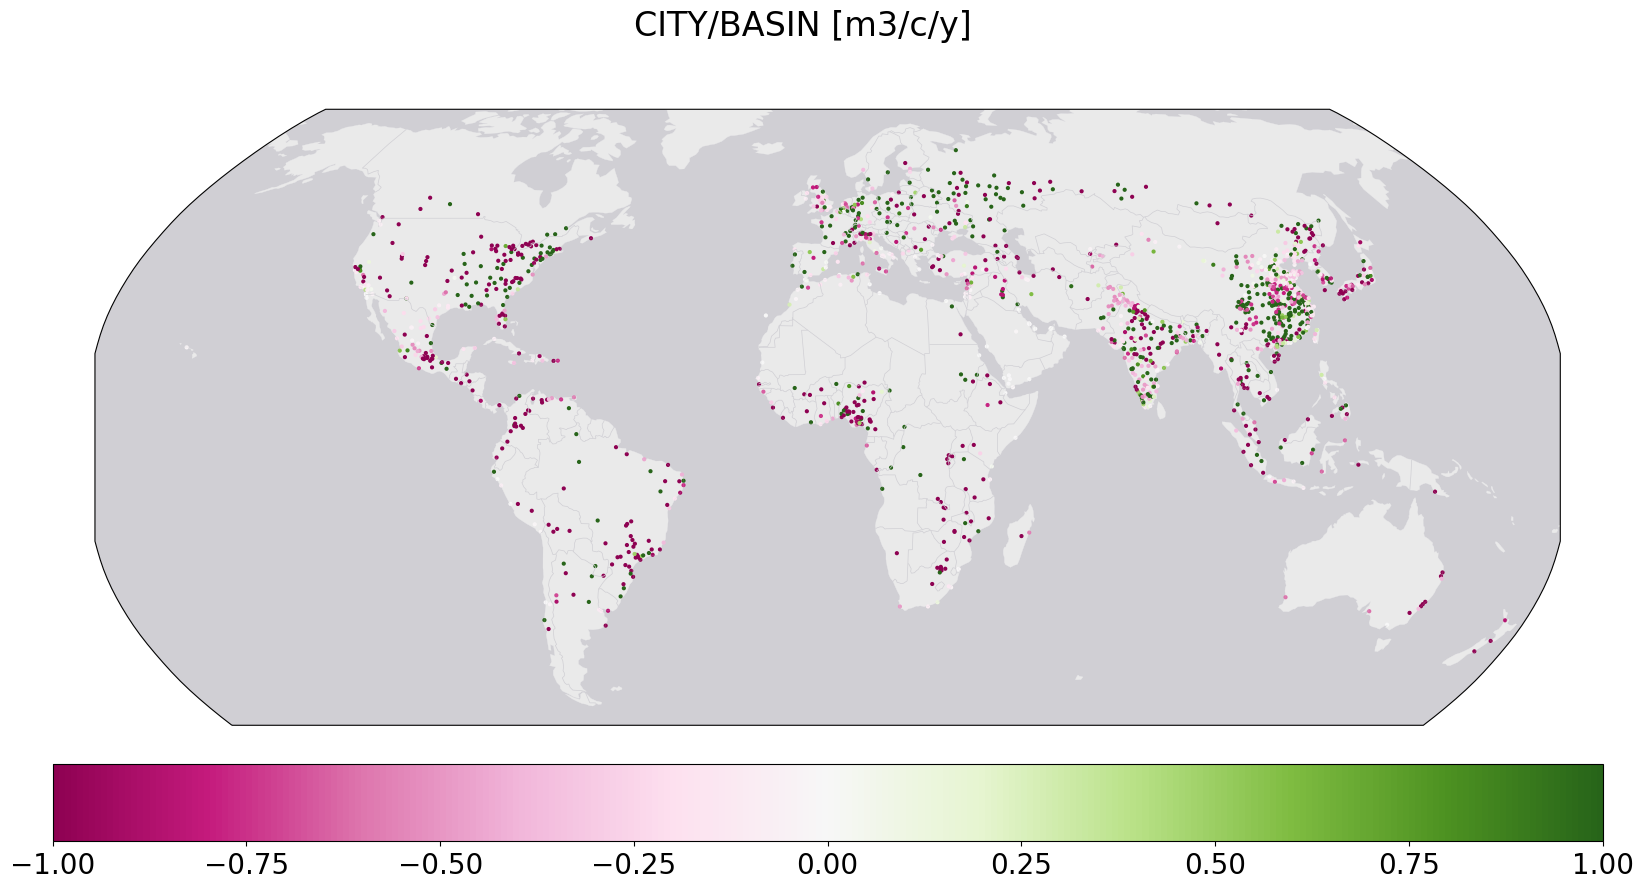

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
city_path = f'{h08dir}/wsi/dat/cmy/cmy_citylonlat.npy'
basin_path = f'{h08dir}/wsi/dat/cmy/cmy_basinlonlat.npy'
city_list = np.load(city_path)
basin_list = np.load(basin_path)
#([city_num, cnt_lon, cnt_lat, cmy])

RATE = []
DIFF = []
# city/basin
# blue(green) = city has more water availability per capita (m3/cap/year)
# red(purple) = basin has more water availability per capita (m3/cap/year) 
for i, j in zip(city_list, basin_list):
    #rate = float(i[3]/j[3])
    rate = i[3]/j[3]
    diff = i[3] - j[3]
    RATE.append((i[0], i[1], i[2], rate))
    DIFF.append((i[0], i[1], i[2], diff))

# diff
diff_array = np.array(DIFF)
percentile = 50
max_abs_diff = np.percentile(np.abs(diff_array[:, 3]), percentile)
diff_tmp = diff_array[:,3] / max_abs_diff
diff_array[:,3] = diff_tmp

# rate
rate_array = np.array(RATE)
rate_tmp = np.empty(len(rate_array))
for i in range(len(rate_array)):
        rate_tmp[i] = np.where(rate_array[i, 3] > 1, rate_array[i,3], -1/rate_array[i, 3])
rate_array[:, 3] = rate_tmp

def plot_world(array, norm, cmap, extent):
    #norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-0.2, vmax=0.2)
    #cmap = 'coolwarm_r'
    #cmap = 'PiYG'
    
    plt.rcParams["font.size"] = 20
    projection = ccrs.Robinson(central_longitude=0)
    crs = ccrs.PlateCarree()
    fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=crs)
    img = ax.scatter(
                  array[:, 1], 
                  array[:, 2], 
                  c=array[:, 3], 
                  s=4, 
                  cmap= cmap,
                  norm=norm,
                  transform=ccrs.PlateCarree(), 
                 )
    #ax.gridlines()
    ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
    ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
    ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', pad=0.05)
    fig.suptitle('CITY/BASIN [m3/c/y]')
    plt.show()

norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
cmap = 'PiYG'
extent = [-180, 180, -60, 75]
plot_world(diff_array, norm, cmap, extent)

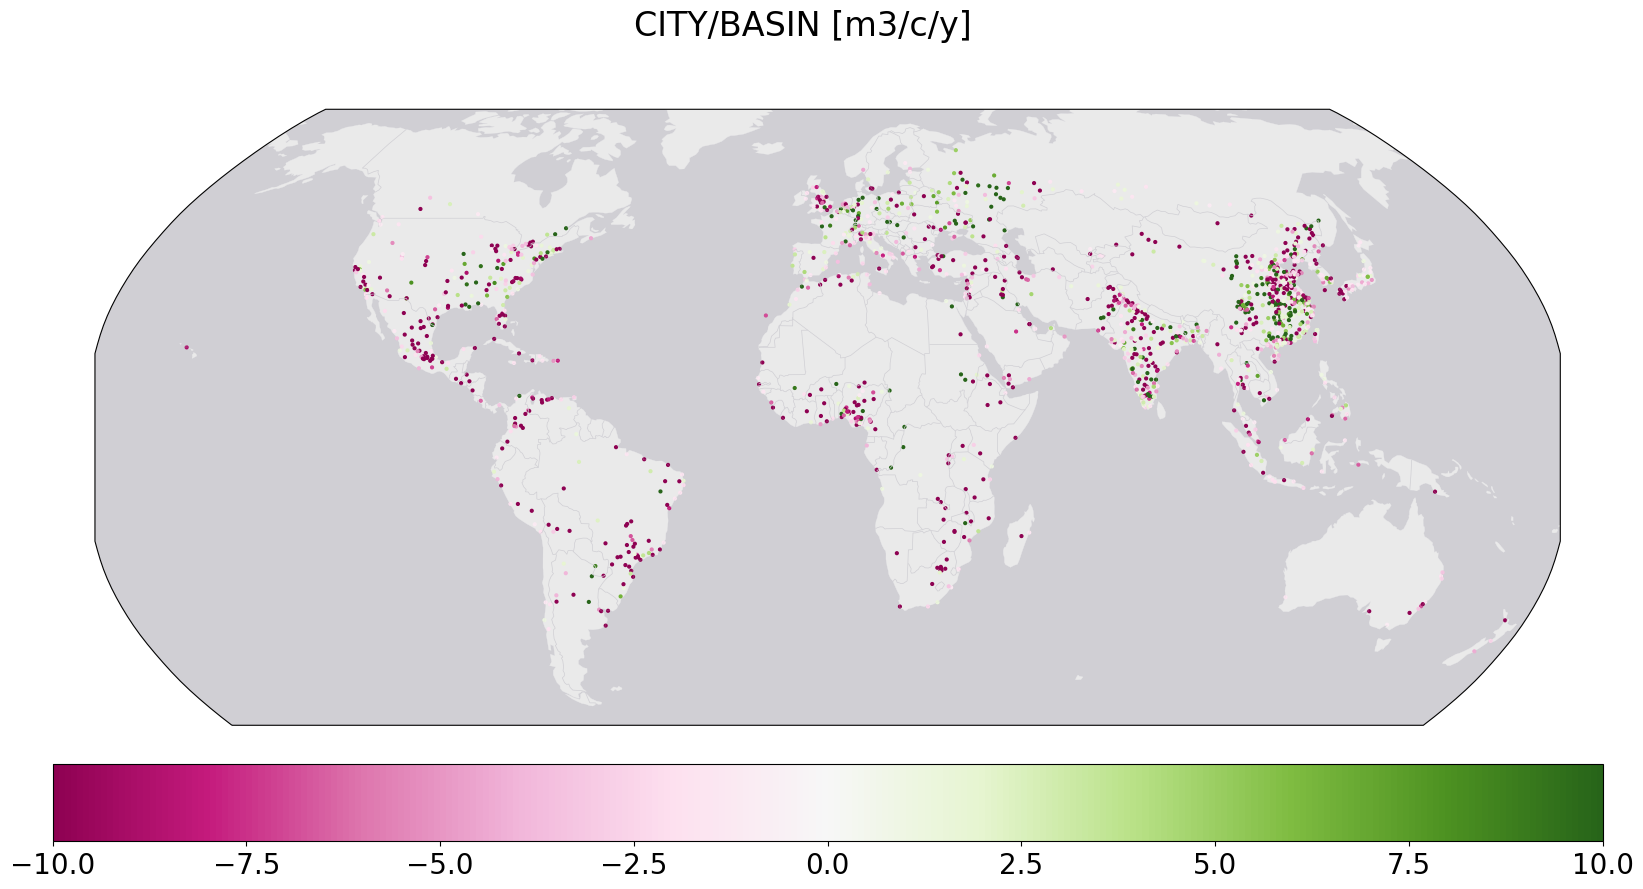

In [54]:
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-10, vmax=10)
cmap = 'PiYG'
extent = [-180, 180, -60, 75]
plot_world(rate_array, norm, cmap, extent)

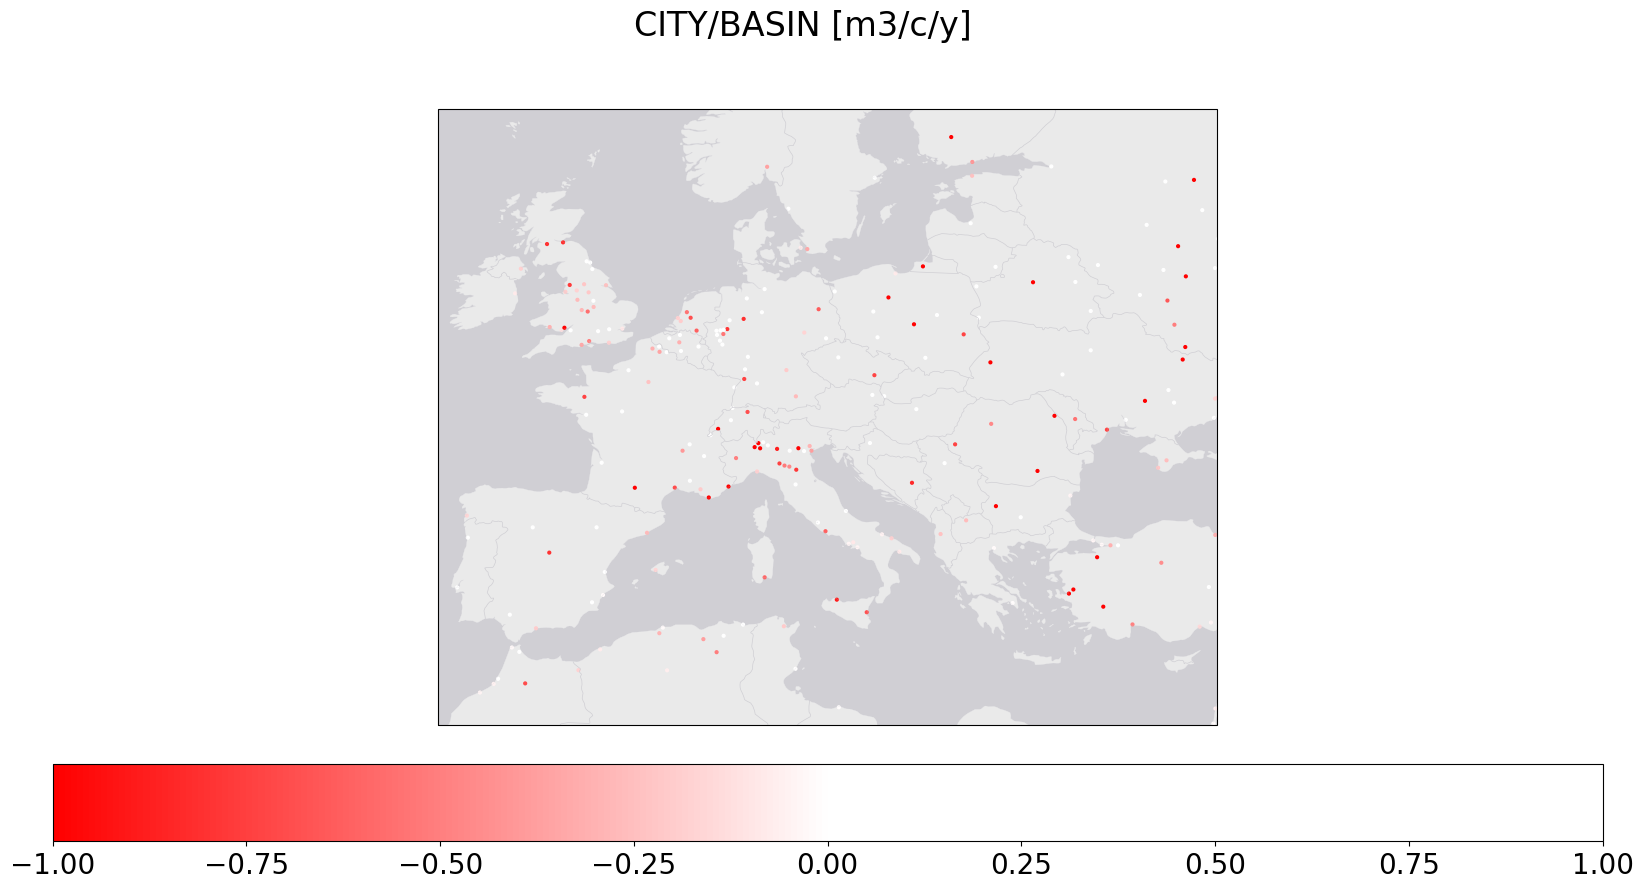

In [43]:
norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-1, vmax=1)
#cmap = 'coolwarm_r'
cmap = mcolors.LinearSegmentedColormap.from_list('RedOrange',['red', '#ffffff', '#ffffff'])
extent = [-10, 35, 32, 63]
plot_world(diff_array, norm, cmap, extent)

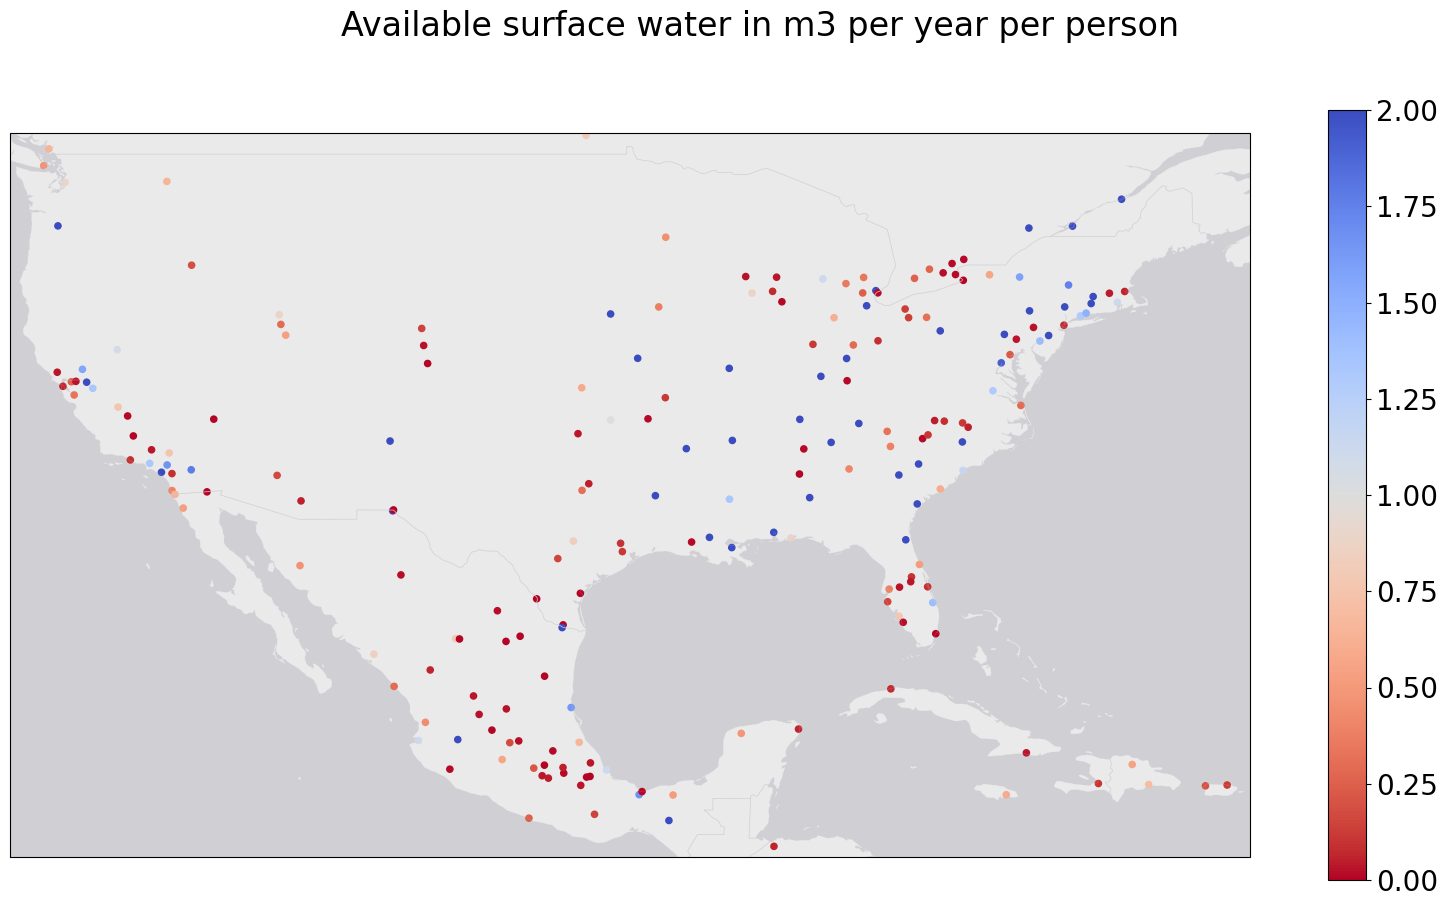

In [8]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([-125, -65, 15, 50], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

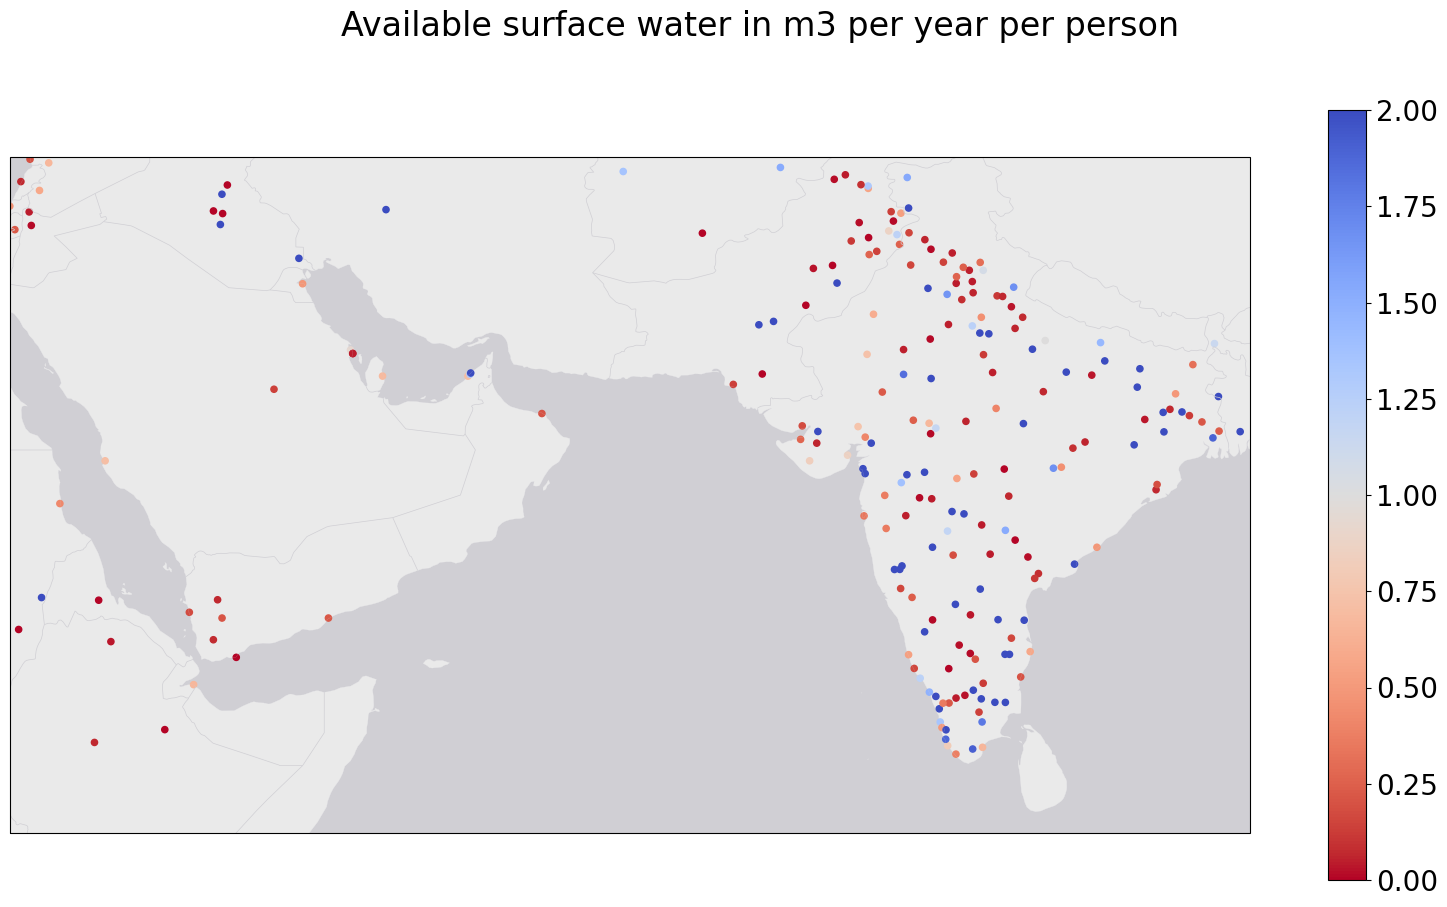

In [9]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([35, 90, 5, 35], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()

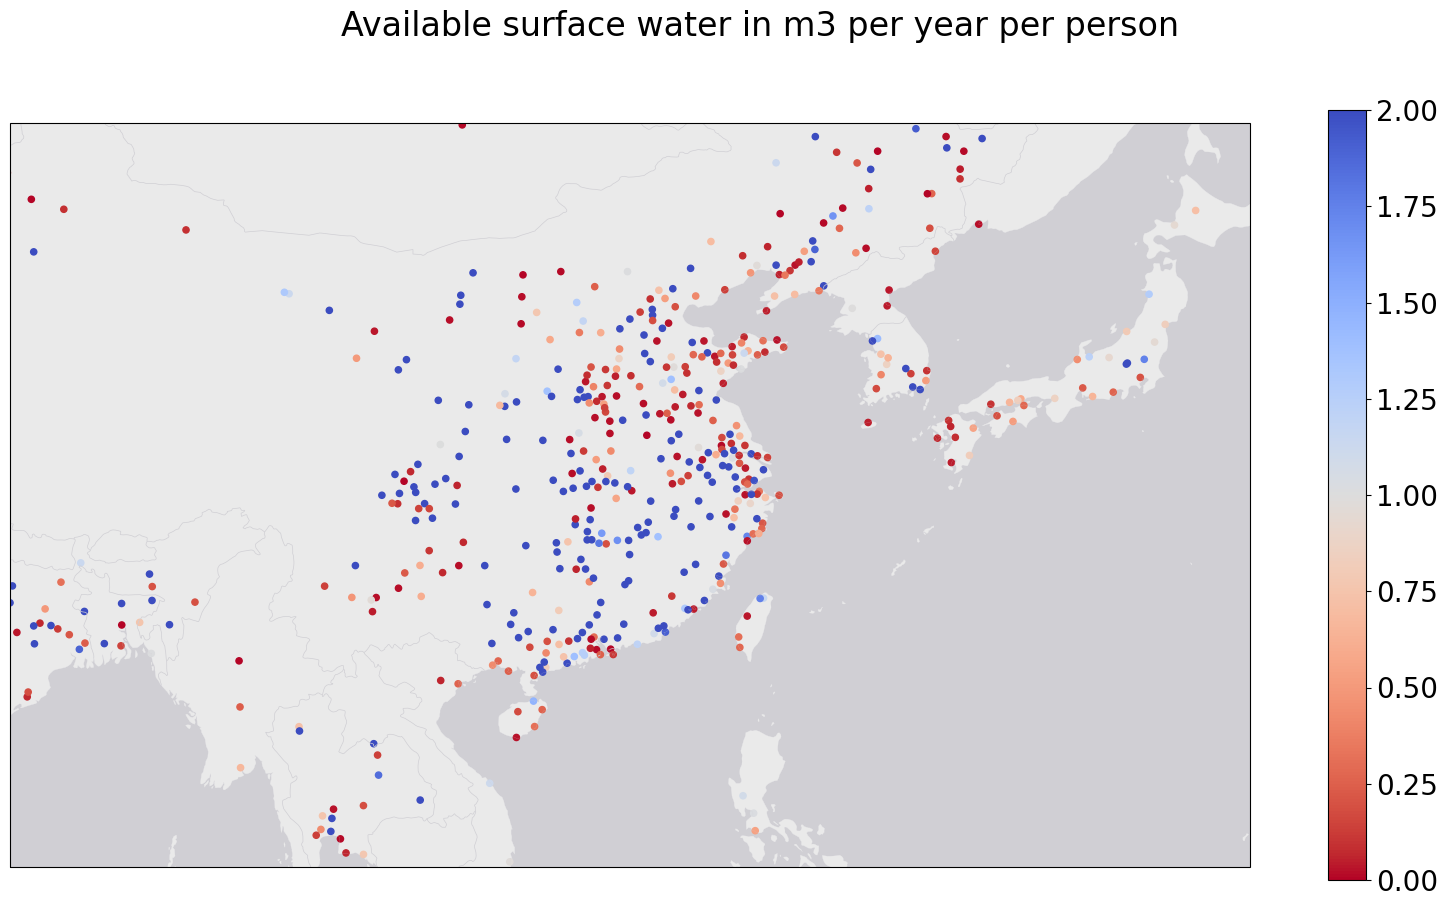

In [10]:
norm = mcolors.TwoSlopeNorm(vcenter=1, vmin=0, vmax=2)
cmap = 'coolwarm_r'

plt.rcParams["font.size"] = 20
projection = ccrs.PlateCarree(central_longitude=0)
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(20,10), subplot_kw={'projection': projection})
ax.set_extent([85, 145, 12, 48], crs=crs)
img = ax.scatter(
              rate_array[:, 1], 
              rate_array[:, 2], 
              c=rate_array[:, 3], 
              s=20, 
              cmap= cmap,
              norm=norm,
              transform=ccrs.PlateCarree(), 
             )
#ax.gridlines()
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#eaeaea')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, edgecolor='#d0cfd4')
cbar = fig.colorbar(img, ax=ax, orientation='vertical', pad=0.05)
fig.suptitle('Available surface water in m3 per year per person')
plt.show()